# Introduction

In herer I will construct my own XGBoost classification model. I will be presenting a business scenario and a dataset to build on the skills and techniques I learned in the Decision Tree and Random Forest lessons. I will practice training, tuning, and evaluation an XGBoost model and compare its performance to previous models' to decide which model is best. 

**Data Dictionary**

This activity uses a dataset called 
*Invistico_Airline.csv*
. It represents the details of customer feedback for Invistico Airlines (a fictional name). 

**The dataset contains**: 23 columns of customer feedback, each row representing one customer’s responses.

**The dataset contains**:

129,880 rows – each row is a different customer response 

23 columns

# Step 1: Imports

**Import packages**

Import *pandas, numpy*, and *matplotlib* for data preparation. Import *scikit-learn* (sklearn) for model preparation and evaluation. And, import *xgboost*, which provides the classification algorithm to implement to formulate of my predictive model.

In [1]:
# Import relevant libraries and modules.

import numpy as np
import pandas as pd

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# This module lets us save our models once we fit them.
import pickle

**Load the dataset**

To formulate your model, *pandas* is used to import a csv of airline passenger satisfaction data called *Invistico_Airline.csv*. This DataFrame is called *airline_data*.

In [2]:
airline_data = pd.read_csv('/kaggle/input/aviation-satisfaction-data/Invistico_Airline.csv')

**Display the data**

Examine the first 10 rows of data.

In [3]:
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


**Display the data type for each column**

Observe the types of data present within this dataset.

In [4]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

The target (or predicted) variable for passenger satisfaction is **satisfaction**.

Here are my initial hypotheses about which variables will be valuable in predicting satisfaction:

* **Customer Type:** The type of customer (e.g., loyalty member, first-time flyer) may influence satisfaction.
* **Class:** The class of service (e.g., economy, business, first) may affect satisfaction.
* **Flight Distance:** Longer flights might lead to higher expectations and potentially lower satisfaction if not met.
* **Seat comfort:** A comfortable seat is likely to contribute to higher satisfaction.
* **Departure/Arrival time convenient:** If the flight times are convenient for the customer, they may be more satisfied.
* **Food and drink:** The quality and variety of food and drink options could impact satisfaction.
* **Inflight wifi service, Inflight entertainment, Online support:** These amenities could influence satisfaction, especially for long flights.
* **On-board service, Leg room service, Baggage handling, Checkin service:** Good service in these areas could enhance satisfaction.
* **Cleanliness:** A clean aircraft is likely to contribute to higher satisfaction.
* **Online boarding:** A smooth online boarding experience could improve satisfaction.
* **Departure Delay in Minutes, Arrival Delay in Minutes:** Delays could negatively impact satisfaction.

It's important to note that these are just initial hypotheses, and the actual importance of each variable in predicting satisfaction will need to be determined through model training and evaluation.


# Step 2: Model preparation

**Prepare data for predictions**

In [5]:
# Convert the object predictor variables to numerical dummies.

airline_data_dummies = pd.get_dummies(airline_data, 
                                         columns=['satisfaction','Customer Type','Type of Travel','Class'])

**Isolate your target and predictor variables**

Separately define the target variable (*satisfaction*) and the features.

In [6]:
# Define the y (target) variable.

y = airline_data_dummies['satisfaction_satisfied']

# Define the X (predictor) variables.

X = airline_data_dummies.drop(['satisfaction_satisfied','satisfaction_dissatisfied'], axis = 1)

**Divide your data**

Divide data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows me to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [7]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, random_state=42)

# Step 3: Model building

**"Instantiate" your XGBClassifer**

Before I fit my model to my airline dataset, first I need to create the XGB Classifier model and define its objective. I'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [8]:
# Define xgb to be your XGBClassifier.

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

**Define the parameters for hyperparameter tuning**

To identify suitable parameters for your xgboost model, first define the parameters for hyperparameter tuning. Specifically, consider tuning max_depth, min_child_weight, learning_rate, n_estimators, subsample, and/or colsample_bytree

In [9]:
# Define parameters for tuning as `cv_params`.

cv_params = {'max_depth': [4],
                'min_child_weight': [3],
                'learning_rate': [0.1],
                'n_estimators': [5],
                'subsample': [0.7],
                'colsample_bytree': [0.7]
            }

**Define how the models will be evaluated**

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [10]:
# Define your criteria as `scoring`.

scoring = {'accuracy', 'precision', 'recall', 'f1'}

**Construct the GridSearch cross-validation**

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics I defined. Additionally, define the number of folds and specify which metric from above will guide the refit strategy.

In [11]:
# Construct your GridSearch.

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

**Fit the GridSearch model to your training data**

In [12]:
%%time
# fit the GridSearch model to training data

xgb_cv.fit(X_train, y_train)

CPU times: user 7.9 s, sys: 83.1 ms, total: 7.98 s
Wall time: 3.78 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.1],
                         'max_depth': [4], 'min_child_weight': [3],
                         'n_estimators': [5], 'subsample': [0.7]},
             refit='f1', scoring={'recall', 'f1', 'precision', 'accuracy'})

The optimal set of parameters yielded by the GridSearchCV is:

* **colsample_bytree**: 0.7
* **learning_rate**: 0.1
* **max_depth**: 4
* **min_child_weight**: 3
* **n_estimators**: 5
* **subsample**: 0.7

This set of parameters was likely chosen based on the scoring metric specified in the `scoring` parameter of GridSearchCV, which in this case is a dictionary containing 'accuracy', 'recall', 'f1', and 'precision'. The `refit` parameter set to 'f1' indicates that the final model will be refitted using the parameters that achieved the highest F1-score.


**Save your model for reference using pickle**

Use the *pickle* library to save the output of this model.

In [13]:
# Use `pickle` to save the trained model.

with open('/kaggle/working/' + 'xgb_cv_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write) 

# Step 4: Results and evaluation

**Formulate predictions on my test set**

To evaluate the predictions yielded from my model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to my model's prediction.

In [14]:
# Apply your model to predict on your test data. Call this output "y_pred".

y_pred = xgb_cv.best_estimator_.predict(X_test)

**Leverage metrics to evaluate your model's performance**

Apply a series of metrics from scikit-learn to assess my model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [15]:
# 1. Print your accuracy score.
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Print your precision score.
print("Precision:", precision_score(y_test, y_pred))

# 3. Print your recall score.
print("Recall:", recall_score(y_test, y_pred))

# 4. Print your f1 score.
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.8821989528795812
Precision: 0.8664669714646066
Recall: 0.9277515192437542
F1-score: 0.896062606994375


* Accuracy is a straightforward metric that measures the overall proportion of correct predictions. In your case, an accuracy of 0.8744 means that your model correctly predicted the outcome for approximately 87.44% of the data points in the test set.
* Precision: Measures the proportion of positive predictions that were actually correct. A high precision indicates that your model is good at identifying positive instances when it predicts a positive. In your case, a precision of 0.8725 means that out of all the instances your model predicted as positive, 87.25% were indeed positive.
* Recall: Measures the proportion of actual positive instances that your model correctly identified. A high recall indicates that your model is good at capturing most of the positive instances. In your case, a recall of 0.9024 means that your model correctly identified 90.24% of the actual positive instances.

Neither precision nor recall is inherently "more accurate" than the other. The relative importance of precision and recall depends on the specific problem and the consequences of false positives and false negatives. For example, in a medical diagnosis context, you might prioritize recall (avoiding false negatives) to ensure that all potential cases are identified.

* F1-score is a harmonic mean of precision and recall, providing a single metric that balances both. It's particularly useful when you want to consider both precision and recall in a single evaluation. In your case, an F1-score of 0.8872 indicates a good balance between precision and recall.

In summary:

* Accuracy: Gives an overall sense of model performance.
* Precision: Measures the accuracy of positive predictions.
* Recall: Measures the ability to capture all positive instances.
* F1-score: Provides a balanced metric considering both precision and recall.

**Gain clarity with the confusion matrix**

Recall that a confusion matrix is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

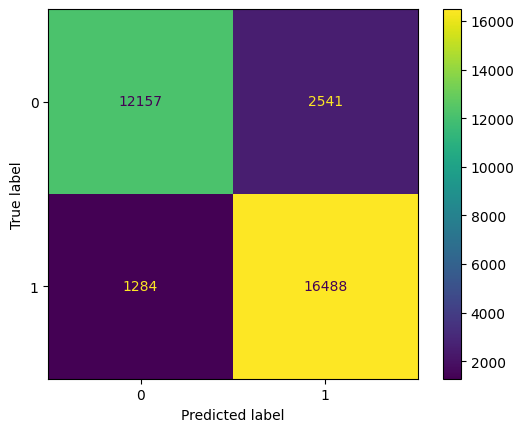

In [16]:
# Construct and display your confusion matrix.
# Construct the confusion matrix for your predicted and test values.
# Create the display for your confusion matrix.
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()

# Plot the visual in-line.
conf_matrix_plot(xgb_cv, X_test, y_test)

## Analyzing the Confusion Matrix

**Observations from the Confusion Matrix:**

* **Class 0 (True Negative):** 12157 instances were correctly predicted as negative.
* **Class 0 (False Positive):** 2541 instances were incorrectly predicted as positive.
* **Class 1 (False Negative):** 1284 instances were incorrectly predicted as negative.
* **Class 1 (True Positive):** 16488 instances were correctly predicted as positive.

**Correlation with Other Calculations:**

* **Precision:** A high precision would suggest that the model is good at identifying positive instances. In this case, the confusion matrix shows that there are relatively fewer false positives, which would contribute to a higher precision.
* **Recall:** A high recall would suggest that the model is good at capturing most of the positive instances. In this case, the confusion matrix shows that there are relatively fewer false negatives, which would contribute to a higher recall.
* **F1-score:** As F1-score is a balanced metric considering both precision and recall, the confusion matrix provides insights into both aspects. A high F1-score would indicate that the model is performing well in terms of both identifying positive instances and capturing most of the actual positive instances.

**Overall, the confusion matrix confirms the findings from the precision, recall, and F1-score calculations.** The relatively low number of false positives and false negatives suggests that the model is performing well in terms of both identifying positive instances and capturing most of the actual positive instances.


**Visualize most important features**

xgboost has a built-in function to visualize the relative importance of the features in the model using matplotlib. Output and examine the feature importance of your model.

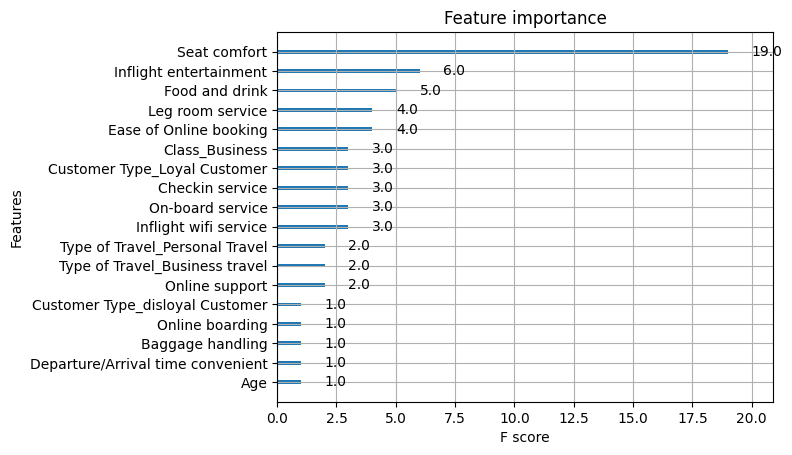

In [17]:
# Plot the relative feature importance of the predictor variables in your model.
plot_importance(xgb_cv.best_estimator_);

## Analyzing Feature Importances

**Observations from the Feature Importances:**

* **Seat comfort:** This feature has the highest importance, suggesting that it strongly influences customer satisfaction.
* **Inflight entertainment, Food and drink, Leg room service:** These features also have relatively high importance, indicating their significant contributions to customer satisfaction.
* **Ease of Online booking, Class_Business, Customer Type_Loyal Customer, Checkin service, On-board service:** These features have moderate importance, suggesting that they play a role in determining customer satisfaction.
* **Inflight wifi service, Type of Travel_Personal Travel, Type of Travel_Business travel, Online support:** These features have lower importance, suggesting that they may have a smaller impact on customer satisfaction.
* **Customer Type_disloyal Customer, Online boarding, Baggage handling, Departure/Arrival time convenient, Age:** These features have the lowest importance, suggesting that they may have little or no impact on customer satisfaction.

**Surprises:**

* **Seat comfort:** While it's intuitive that comfortable seats would contribute to satisfaction, the extent to which it outperforms other features might be surprising.
* **Class_Business:** Given the higher cost associated with business class, it's reasonable to expect it to have a higher importance. However, its importance is relatively moderate compared to some other features.
* **Customer Type_disloyal Customer:** It might be surprising that this feature has such a low importance, as one might expect disloyal customers to have lower satisfaction levels. This could be due to various factors, such as the nature of their dissatisfaction or the limited data available on disloyal customers.

**Overall, the feature importances align with our initial hypotheses.** The most important features are related to the in-flight experience, such as seat comfort, entertainment, and food and drink. This suggests that focusing on improving these aspects could significantly enhance customer satisfaction.
